#  Advanced ML 

## SVM - Decision Boundaries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline


### SVM-Kernels

The real power of SVMs lies in using kernels, which allow for non-linear decision boundaries. A kernel defines a similarity measure between data points. The most common are:

- **linear** will give linear decision frontiers. It is the most computationally efficient approach and the one that requires the least amount of data.

- **poly** will give decision frontiers that are polynomial. The order of this polynomial is given by the 'order' argument.

- **rbf** uses 'radial basis functions' centered at each support vector to assemble a decision frontier. The size of the RBFs ultimately controls the smoothness of the decision frontier. RBFs are the most flexible approach, but also the one that will require the largest amount of data.

Predictions in a kernel-SVM are made using the formular

$$
\hat{y} = \text{sign}(\alpha_0 + \sum_{j}\alpha_j y_j k(\mathbf{x^{(j)}}, \mathbf{x}))
$$

where $\mathbf{x}^{(j)}$ are training samples, $\mathbf{y}^{(j)}$ the corresponding labels, $\mathbf{x}$ is a test-sample to predict on, $k$ is the kernel, and $\alpha$ are learned parameters.

What this says is "if $\mathbf{x}$ is similar to $\mathbf{x}^{(j)}$ then they probably have the same label", where the importance of each $\mathbf{x}^{(j)}$ for this decision is learned. [Or something much less intuitive about an infinite dimensional Hilbert-space]

Often only few samples have non-zero $\alpha$, these are called the "support vectors" from which SVMs get their name.
These are the most discriminant samples.


Three different types of SVM-Kernels are displayed below. The polynomial and RBF are especially useful when the data-points are not linearly separable.

In [3]:
# Our dataset and targets
X = np.c_[(.4, -.7),
          (-1.5, -1),
          (-1.4, -.9),
          (-1.3, -1.2),
          (-1.1, -.2),
          (-1.2, -.4),
          (-.5, 1.2),
          (-1.5, 2.1),
          (1, 1),
          # --
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (.5, -2.4),
          (.2, -2.3),
          (0, -2.7),
          (1.3, 2.1)].T

Y = [0] * 8 + [1] * 8

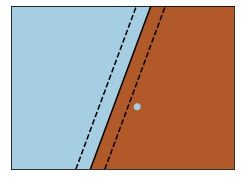

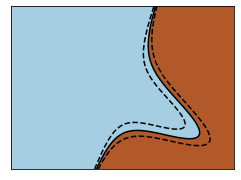

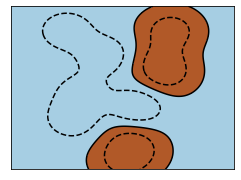

In [4]:
# figure number
fignum = 1

# fit the model
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()